In [1]:
import torch
import numpy as np
from PIL import Image
from bldc import BlendedLatentDiffusionWithControlNet, SamImageProcessor, ImageGridDisplay

# Usage
img_processor = SamImageProcessor("img.png")
img_processor.run()

In [2]:
prompt='Pizza on the marble table with dishes, forks and knives'

bld_controlnet = BlendedLatentDiffusionWithControlNet(
    prompt=prompt,
    init_image='image.png',
    mask='mask.png',
    model_path='stabilityai/stable-diffusion-2-1-base',
    controlnet_model_path='thibaud/controlnet-sd21-canny-diffusers',  # ControlNet SD 2.1 Canny model path
    batch_size=1,
    blending_start_percentage=0.10,
    device='cuda:2',
    output_path='output.png'
)

results = bld_controlnet.edit_image(
    bld_controlnet.init_image,
    bld_controlnet.mask,
    num_inference_steps=100,
    guidance_scale=7.0,
    prompts=[bld_controlnet.prompt] * bld_controlnet.batch_size,
    blending_percentage=bld_controlnet.blending_start_percentage,
)

results_flat = np.concatenate(results, axis=1)
Image.fromarray(results_flat).save(bld_controlnet.output_path)

/intern1/mmai04/anaconda3/lib/python3.11/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/intern1/mmai04/anaconda3/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


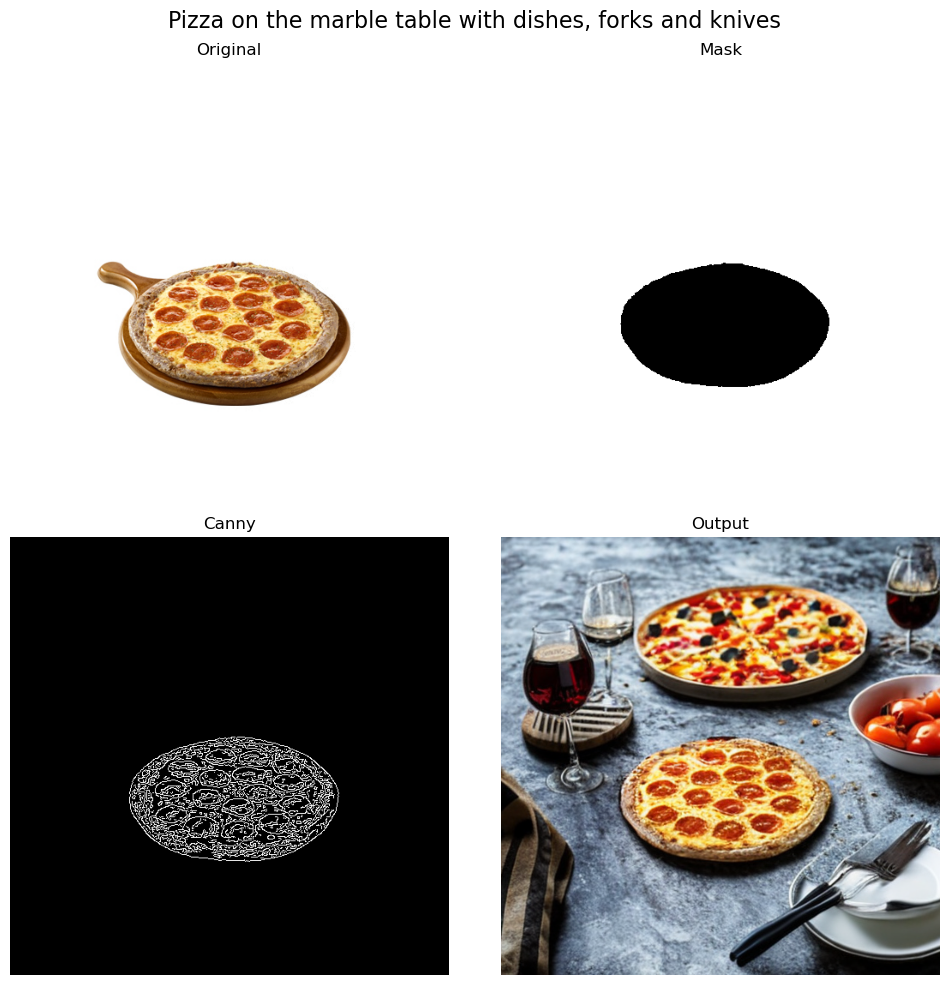

In [3]:

img_display = ImageGridDisplay('original.png', 'mask.png', 'canny.png', 'output.png', prompt)
img_display.display()